# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
%matplotlib inline

### Reading the Mosaic Image

In [2]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'

In [3]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    img = cv2.imread(IMG_NAME) 
    return img

mosaic_img = read_image(IMG_DIR + IMG_NAME)# YOUR CODE HERE
unmosaic_img = read_image(IMG_DIR + "crayons.jpg")

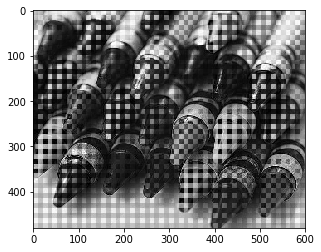

In [4]:
# For a sanity check, display your image here
plt.imshow(mosaic_img)

### Linear Interpolation

In [5]:
### HINT : You might want to use filters

In [6]:
### HINT : To use filters you might want to write your kernels

In [7]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [8]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [9]:
# this is the convolve soln
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    ### YOUR CODE HERE ###
    R_mask = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    B_mask = np.zeros((mosaic_shape[0], mosaic_shape[1]))
    G_mask = np.zeros((mosaic_shape[0], mosaic_shape[1]))

    # Get the masks for each channel
    R_mask[0::2, 0::2] = 1
    B_mask[1::2, 1::2] = 1
    G_mask[0::2, 1::2] = 1
    G_mask[1::2, 0::2] = 1
    
    # Get the values for each channel
    R_channel = mosaic_img[:,:,0] * R_mask
    B_channel = mosaic_img[:,:,0] * B_mask
    G_channel = mosaic_img[:,:,0] * G_mask
    
    # weight kernels
    RB_kernel = np.array(
            [[1, 2, 1],
             [2, 4, 2],
             [1, 2, 1]]) / 4

    G_kernel = np.array(
            [[0, 1, 0],
             [1, 4, 1],
             [0, 1, 0]]) / 4 

    ## compute the missing values for each channel.
    R = scipy.ndimage.convolve(R_channel, RB_kernel)
    B = scipy.ndimage.convolve(B_channel, RB_kernel)
    G = scipy.ndimage.convolve(G_channel, G_kernel)

    soln_image = np.dstack((R,G,B))
    soln_image = np.clip(soln_image, 0, 255).astype(np.uint8) 
    return soln_image

In [10]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    soln_shape = soln_image.shape
    #soln_image = soln_image.astype(np.uint32)
    #original_image = original_image.astype(np.uint32)
    
    pp_err = 0.0
    max_err = 0.0

    mapping = np.zeros((soln_shape[0], soln_shape[1]))
    
    for i in range(0, soln_shape[0]):
        for j in range(0, soln_shape[1]):
            current_err = \
            (float(soln_image[i][j][0]) - float(original_image[i][j][2])) ** 2\
            + (float(soln_image[i][j][1]) - float(original_image[i][j][1])) ** 2\
            + (float(soln_image[i][j][2]) - float(original_image[i][j][0])) ** 2
            
            if current_err > max_err:
                max_err = current_err
            
            pp_err = pp_err + current_err
            
            mapping[i][j] = current_err
    
    # print the error map
    plt.matshow(np.sqrt(mapping / 3))       
    return pp_err / (soln_shape[0] * soln_shape[1]), max_err


We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

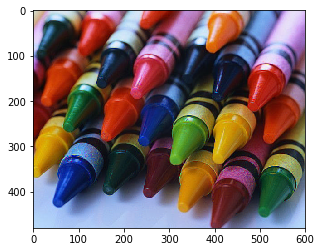

In [11]:
mosaic_img = read_image(IMG_DIR + 'crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)

The average per-pixel error for crayons is: 225.82983333333334
The maximum per-pixel error for crayons is: 53633.0


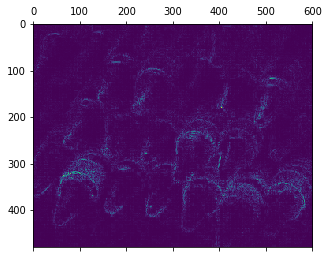

In [12]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

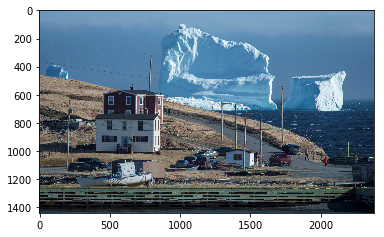

In [13]:
mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)

The average per-pixel error for iceberg is: 121.74344009469166
The maximum per-pixel error for iceberg is: 45565.0


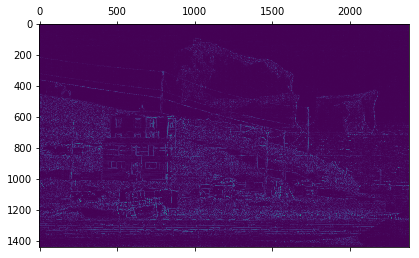

In [14]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

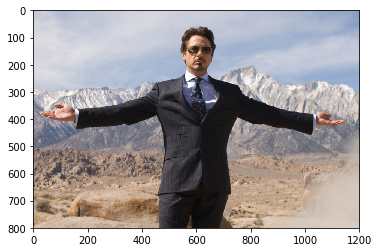

In [15]:
mosaic_img = read_image(IMG_DIR + 'tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)

The average per-pixel error for tony is: 81.219859375
The maximum per-pixel error for tony is: 40573.0


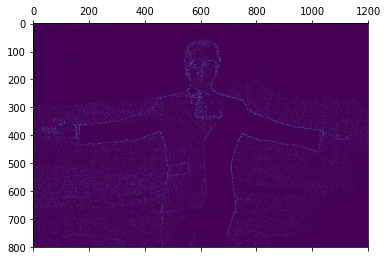

In [16]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

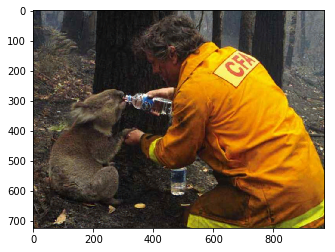

In [17]:
mosaic_img = read_image(IMG_DIR + 'hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
plt.imshow(soln_image)

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [18]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    raw_img = get_solution_image(mosaic_img)
    R = raw_img[:,:,0]
    G = raw_img[:,:,1]
    B = raw_img[:,:,2]
    
    ## Below two lines need to be updated.
    R = G + scipy.signal.medfilt2d(R - G)
    B = G + scipy.signal.medfilt2d(B - G)
    freeman_soln_image = np.dstack((R,G,B))
    return freeman_soln_image

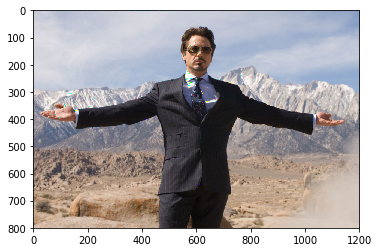

In [19]:
mosaic_img = read_image(IMG_DIR + 'tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
plt.imshow(soln_image)

The average per-pixel error for tony is: 121.25932916666666
The maximum per-pixel error for tony is: 130050.0


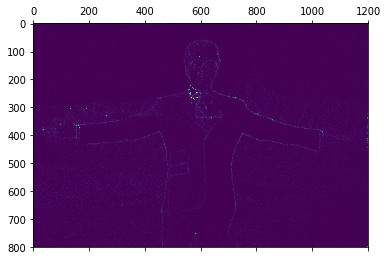

In [20]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [21]:
### Feel free to play around with other images for Freeman's method above ###

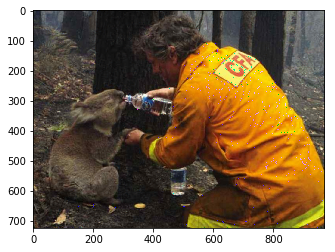

The average per-pixel error for iceberg is: 446.5824423920142
The maximum per-pixel error for iceberg is: 128526.0


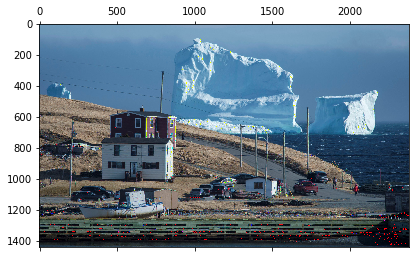

The average per-pixel error for crayons is: 1123.4023229166667
The maximum per-pixel error for crayons is: 128525.0


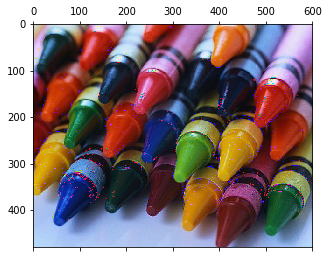

In [22]:
mosaic_img = read_image(IMG_DIR + 'hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
plt.imshow(soln_image)
plt.show()

mosaic_img = read_image(IMG_DIR + 'iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'iceberg.jpg')
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))
# Generate your solution image here and show it
plt.imshow(soln_image)
plt.show()

mosaic_img = read_image(IMG_DIR + 'crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR + 'crayons.jpg')
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))
# Generate your solution image here and show it
plt.imshow(soln_image)
plt.show()

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [23]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    original_shape = np.shape(original_image)
    mosaic_image = np.zeros((original_shape[0], original_shape[1], 3))
    for i in range(0, original_shape[0], 2):
        for j in range(0, original_shape[1], 2):
            mosaic_image[i][j][0] = original_image[i][j][2]
            mosaic_image[i][j][1] = original_image[i][j][2]
            mosaic_image[i][j][2] = original_image[i][j][2]
            
            if i + 1 < original_shape[0]:
                mosaic_image[i + 1][j][1] = original_image[i + 1][j][1]
                mosaic_image[i + 1][j][0] = original_image[i + 1][j][1]
                mosaic_image[i + 1][j][2] = original_image[i + 1][j][1]
            if j + 1 < original_shape[1]:
                mosaic_image[i][j + 1][1] = original_image[i][j + 1][1]
                mosaic_image[i][j + 1][0] = original_image[i][j + 1][1]
                mosaic_image[i][j + 1][2] = original_image[i][j + 1][1]
            if i + 1 < original_shape[0] and j + 1 < original_shape[1]:
                mosaic_image[i + 1][j + 1][2] = original_image[i + 1][j + 1][0]
                mosaic_image[i + 1][j + 1][0] = original_image[i + 1][j + 1][0]
                mosaic_image[i + 1][j + 1][1] = original_image[i + 1][j + 1][0]
    outcome = mosaic_image.astype(np.uint8)   
    return outcome

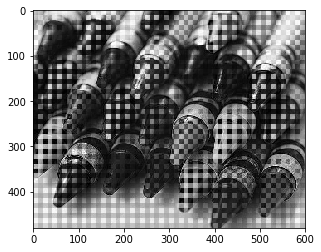

The average per-pixel error for my crayons is: 0.0
The maximum per-pixel error for my crayons is: 0.0


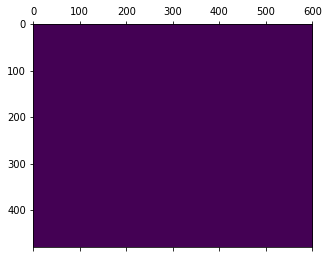

In [24]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function
original_img_tony = read_image(IMG_DIR + 'crayons.jpg')
standard_mosaic_tony = read_image(IMG_DIR + 'crayons.bmp')
mosaic_img_tony = get_mosaic_image(original_img_tony)

plt.imshow(mosaic_img_tony)
plt.show()
pp_err, max_err = compute_errors(mosaic_img_tony, standard_mosaic_tony)
print("The average per-pixel error for my crayons is: "+str(pp_err))
print("The maximum per-pixel error for my crayons is: "+str(max_err))

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

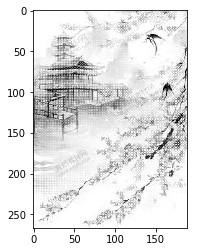

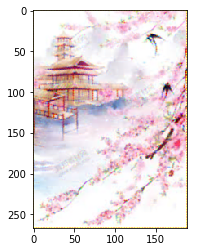

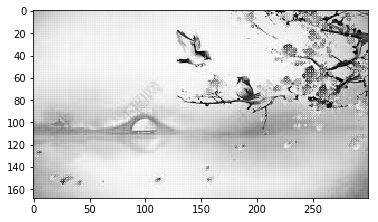

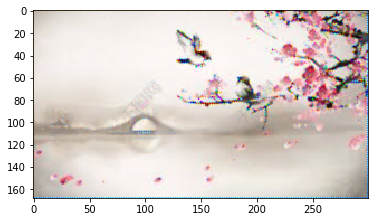

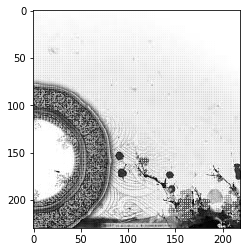

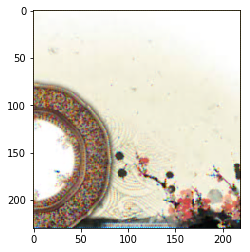

In [25]:
### YOUR CODE HERE ###
original_img_tony = read_image(IMG_DIR + 'blossom.jpg')
mosaic_img_tony = get_mosaic_image(original_img_tony)

plt.imshow(mosaic_img_tony)
plt.show()

demosaic_myself = get_solution_image(mosaic_img_tony)
plt.imshow(demosaic_myself)
plt.show()

# second
original_img_tony = read_image(IMG_DIR + 'bridge.jpg')
mosaic_img_tony = get_mosaic_image(original_img_tony)

plt.imshow(mosaic_img_tony)
plt.show()

demosaic_myself = get_solution_image(mosaic_img_tony)
plt.imshow(demosaic_myself)
plt.show()

# third
original_img_tony = read_image(IMG_DIR + 'mirror.jpg')
mosaic_img_tony = get_mosaic_image(original_img_tony)

plt.imshow(mosaic_img_tony)
plt.show()

demosaic_myself = get_solution_image(mosaic_img_tony)
plt.imshow(demosaic_myself)
plt.show()

### Bonus Points

In [26]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####